# Elliptical Orbits

The aim is to find the velocities of two stars about the Center of Mass given the same parameters as before, but also including eccentricity.
We will plot the velocities in the CoM frame.

## 1. Analytical Solution
First we will solve it using the analytical solution which I derived.

Equations which we will be using:

$$ \mu = \frac{m_1 m_2}{m_1 + m_2} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; M = m_1 + m_2 $$

$$ r = \frac{a(1-e^2)}{1+e\cos \theta} \tag{1}$$

$$ l = a(1-e^2) \tag{2}$$

Radius Vector in terms of Eccentric Anomaly,
$$ r = a(1 - e \cos E) \tag{3}$$

Eccentric Anomaly,
$$ \mathcal{M} = E - e \sin E \tag{4}$$

Mean Anomaly, 
$$ \mathcal{M} = \frac{2 \pi}{P} (t-t_0) \tag{5}$$

Truw Anomaly, 
$$ \cos \theta = \frac{\cos E - e}{1 - e \cos E} $$

The Newton-Raphson Method for finding the value of E

$$ x_{n+1} = x_{n} - \frac{f(x)}{f'(x)} $$

$$ f(x) = E - e \sin E - M $$

$$ f'(x) = 1 - e \cos E $$

$$ E_{i+1} = \frac{\mathcal{M} - e(E_i \cos E_i - \sin E_i)}{1 - e \cos E_i} \tag{6}$$

Velocity (vis-viva equation), 
$$ v^2 = GM\left(\frac{2}{r}-\frac{1}{a}\right) \tag{7}$$
in relative frame.

### CoM Frame


$$ \vec r_1 = - \frac{\mu}{m_1} \vec r \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \vec r_2 = \frac{\mu}{m_2} \vec r \tag{8}$$

$$ \ddot r_1 = - \frac{\mu}{m_1} \ddot r \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \ddot r_2 = \frac{\mu}{m_2} \ddot r \tag{9}$$

$$ \ddot r_1 = - \frac{G m_2}{r^2} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \ddot r_2 = \frac{G m_1}{r^2} \tag{10}$$


$$ v_1^2 = G \left(\frac{\mu m_2}{m_1}\right) \left(\frac{2}{r_1}-\frac{1}{a}\right) \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; v_2^2 = G \left(\frac{\mu m_1}{m_2}\right) \left(\frac{2}{r_2}-\frac{1}{a}\right) \tag{11}$$



#### Using NR method for solving E

NR Algorithm
1. Read x0, epsilon, delta, n

    x0 - initial guess,
    epsilon - prescribed relative error,
    delta - prescribed lower bound,
    n - max. no. of iterations
2. for i = 1 to n in steps of 1 *do*
3. f0 = f(x0)
4. f'0 = f'(x0)
5. if |f'0|<= delta then GOTO 11
6. x1 = x0 - (f0/f'0)
7. if |(x1-x0)/x1| < epsilon then GOTO 13
8. x0 = x1
*endfor*
9. Write 'Does not converge in n iterations', f0, f'0, x0, x1
10. Stop
11. Write 'Slope too small', f0, f'0, x0, i
12. Stop
13. Write 'Convergent Solution', x1, f(x1), i
14. Stop    

## Sample System - Alpha Centauri System

Let's take Alpha Centauri System for our calculations

#### Alpha Centauri A

| Parameters | Symbol| Value | Units |
|------------|-------|-------|-------|
|Mass| m1 | 1.1 | $M_\odot$ |
|Semi-Major Axis| a1 | 10.57 | AU |
|Radius | R1 | 1.2234 | $R_\odot$ |



#### Alpha Centauri B

| Parameters | Symbol| Value | Units |
|------------|-------|-------|-------|
|Mass| m2 | 0.907 | $M_\odot$ |
|Semi-Major Axis| a2 | 12.82 | AU |
|Radius | R2 | 0.8632 | $R_\odot$ |


#### Orbit

| Parameters | Symbol| Value | Units |
|------------|-------|-------|-------|
|Period | P | 79.91±0.011 | yr |
|Semi-major axis | a | 23 | AU |
|Eccentricity | e | 0.5179±0.00076| |
|Inclination | i |79.205±0.041°|deg|
|Longitude of the node | Ω |204.85±0.084°|deg|
|Periastron epoch | T |1875.66±0.012| |
|Argument of periastron(secondary)| ω |231.65±0.076°|deg|
|Recent Periastron||Aug 1955|
|Next Periastron||May 2035|

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as ac, units as u
from prettytable import PrettyTable

+----------------------------------------+--------------------+--------+
| Parameter                              |       Value        |  Unit  |
+----------------------------------------+--------------------+--------+
| Orbital Eccentricity                   |       0.518        |        |
| Orbital Period                         |       79.91        |   yr   |
| Relative Orbit: Semi-Major Axis        | 23.401538462982412 |   AU   |
| Star 1: Semi-Major Axis                | 10.575583151930765 |   AU   |
| Star 1: Orbital Velocity at Periastron | 10.402156546636828 | km / s |
| Star 2: Semi-Major Axis                | 12.825955311051645 |   AU   |
| Star 2: Orbital Velocity at Periastron | 11.455553671731645 | km / s |
+----------------------------------------+--------------------+--------+


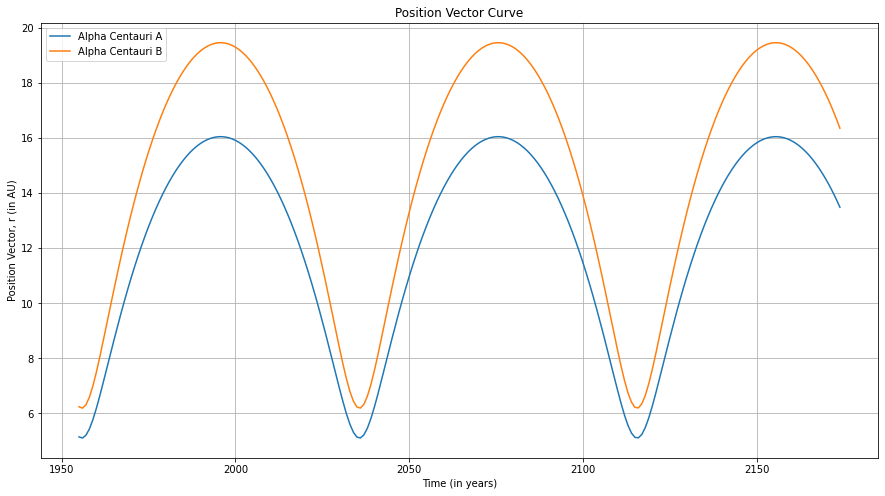

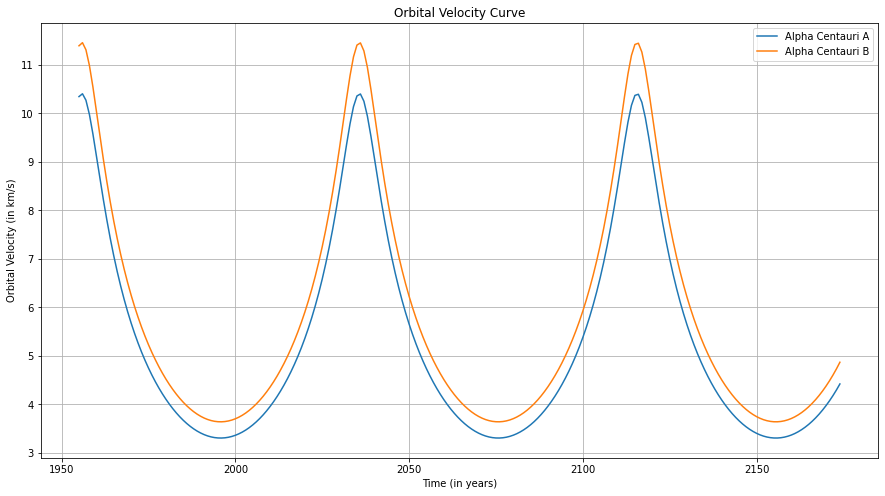

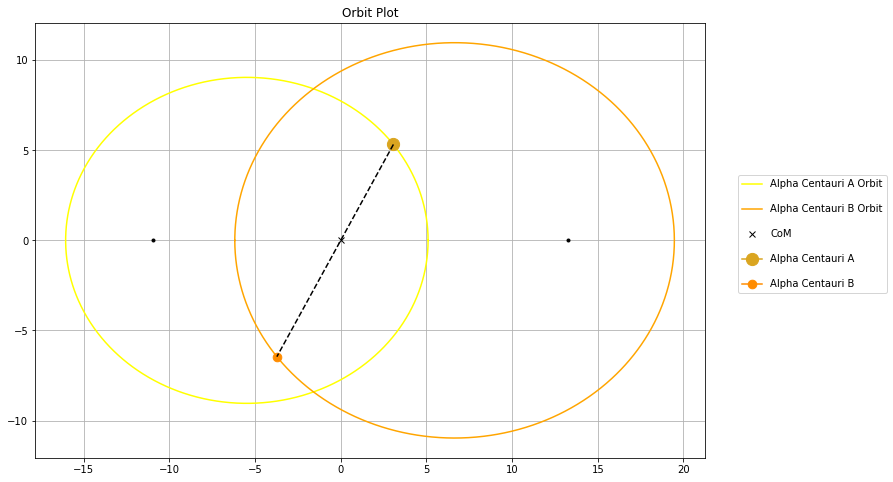

In [4]:
 def orb(m_self,m_part,Period,e,T_0,t0,tf):
        """This function solves the two-body odes using scipy.integrate.solve_ivp using,
        m - mass of stars in solar mass
        Period - period of revolution of star
        e - eccentricity
        T_0 - time of periastron passage
        ti - initial time in year
        tf - final time in year
        x0, y0 - initial coordinates of the star in AU
        vx0, vy0 - initial velocity of the star in Km/s
        """

        m1 = m_self*u.M_sun #in solar mass
        m2 = m_part*u.M_sun
        P = Period*u.year   #in years
        T0 = T_0*u.year     #time of periastron
        t0 = t_0*u.year     #initial time
        tf = t_f*u.year     #final time

        G = ac.G.to('(AU**3)/(solMass year**2)')

        def semi_major_axis(P,m1,m2):
            """This function generates relative semi-major axis."""
            k = G*(m1 + m2)*(P**2) / (4*(np.pi)**2)
            a = k**(1/3)
            return a  #in A.U
        
        def pos_vec(a,e,E):
            """This function generates position vectors."""
            return a*(1 - e*np.cos(E)) #in au
        
        def red_mass(m1,m2):
            """This function generates reduced mass."""
            return (m1*m2)/(m1+m2)
        
        def v_com_frame(mself, mpart, r, a):
            """This function generates Orbital velocities of stars."""
            m = mu*mpart/mself
            d = ((2/r) - (1/a))
            v = np.sqrt(G*m*d) 
            return v #in AU/yr
        
        def mean_anm(t,T_0,P):
            """This function generates Mean Anomaly."""
            return 2*np.pi*(t-T_0)/P
        
        def NR(M_anm,e):
            """This function calculates Eccentric Anomaly from Mean Anomaly using NR method."""
            def E_func(e, Ecc_anm, Mean_anm):
                return Ecc_anm - e*np.sin(Ecc_anm) - Mean_anm

            def E_prime(e, Ecc_anm):
                return 1 - e*np.cos(Ecc_anm)

            E0 = np.pi
            delta = 10**(-3)
            epsilon = 10**(-8)
            E = []

            for i in range(M_anm.size):
                f0 = E_func(e, E0, M_anm[i])
                fprime0 = E_prime(e, E0)
                if fprime0 >= delta:
                    E1 = E0 - (f0/fprime0)
                    while abs((E1 - E0)/E1) > epsilon:
                        E0 = E1
                        f0 = E_func(e, E0, M_anm[i])
                        fprime0 = E_prime(e, E0)
                        E1 = E0 - (f0/fprime0)
                    E.append(E1)
                else:
                    print('Slope too small', fprime0, i)
            E = np.array(E) # in radians
            return E

        def orb_pos_plot(r1,r2,t):
            """This function plots position vector curve."""
            plt.figure(figsize=(15,8))
            plt.plot(t, r1, label = 'Alpha Centauri A')
            plt.plot(t, r2, label = 'Alpha Centauri B')
            plt.title('Position Vector Curve')
            plt.ylabel("Position Vector, r (in AU)")
            plt.xlabel("Time (in years)")
            plt.legend()
            plt.grid()
            plt.show()

        def orb_vel_plot(v1,v2,t):
            """This function plots orbital velocity curve."""
            plt.figure(figsize=(15,8))
            plt.plot(t, v1, label = 'Alpha Centauri A')
            plt.plot(t, v2, label = 'Alpha Centauri B')
            plt.title('Orbital Velocity Curve')
            plt.ylabel("Orbital Velocity (in km/s)")
            plt.xlabel("Time (in years)")
            plt.legend()
            plt.grid()
            plt.show()

        def orbit(a1,a2,e):
            """This function generates coordinates for plotting orbits."""
            def coord(r,the):
                X = r*np.cos(the)
                Y = r*np.sin(the)
                return X,Y
            
            angle = np.linspace(0,2*np.pi,2000)
            l1, l2 = a1*(1-e**2), a2*(1-e**2) 
            r_1, r_2 = l1/(1+e*np.cos(angle)), l2/(1+e*np.cos(angle)) 
            x1, y1 = coord(r_1,angle)
            x2, y2 = coord(r_2,angle+np.pi)
            
            #star marker coords
            r_A, r_B = l1/(1+e*np.cos(np.pi/3)), l2/(1+e*np.cos(np.pi/3))
            X1,Y1 = coord(r_A, np.pi/3)
            X2,Y2 = coord(r_B, np.pi/3 + np.pi)
            
            return x1,y1,x2,y2,X1,Y1,X2,Y2
        
        def orb_plot(x1,y1,x2,y2,X1,Y1,X2,Y2,a1,a2,e):
            """This function plots orbits of stars."""
            plt.figure(figsize=(12,8))
            plt.plot(x1, y1, color='yellow', label='Alpha Centauri A Orbit')
            plt.plot(x2, y2, color='orange', label='Alpha Centauri B Orbit')
            plt.plot(0, 0, 'kx', label='CoM')
            plt.plot(-2*a1*e, 0, 'k.')
            plt.plot(2*a2*e, 0, 'k.')
            plt.plot(X1, Y1, color='goldenrod', marker = 'o', markersize=1.22*10, label='Alpha Centauri A')
            plt.plot(X2, Y2, color='darkorange', marker = 'o', markersize=0.86*10, label='Alpha Centauri B')
            plt.plot([X1.value, X2.value], [Y1.value, Y2.value], 'k--') #connecting line
            plt.title('Orbit Plot')
            plt.xlim()
            plt.ylim()
            plt.legend(bbox_to_anchor=(1.05, 0.65), loc='best', borderaxespad=0.,labelspacing=1.5)
            plt.grid()
            
        def tab_op(P,a,a1,a2,v1,v2):
            """This function generates table of orbital parameters."""
            t = PrettyTable()
            t.field_names = ["Parameter", "Value", "Unit"]
            t.align["Parameter"] = 'l'
            t.add_row(['Orbital Eccentricity',e,""])
            t.add_row(['Orbital Period',P.value,u.year])
            t.add_row(['Relative Orbit: Semi-Major Axis',a.value,u.au])
            t.add_row(['Star 1: Semi-Major Axis',a1.value,u.au])
            t.add_row(['Star 1: Orbital Velocity at Periastron',max(v1).value,u.km/u.s])
            t.add_row(['Star 2: Semi-Major Axis',a2.value,u.au])
            t.add_row(['Star 2: Orbital Velocity at Periastron',max(v2).value,u.km/u.s])
            return print(t)
    
        a = semi_major_axis(P,m1,m2)                # in AU
        mu = red_mass(m1,m2)                        #in solar mass
        a1 = (mu/m1)*a                              # in AU
        a2 = (mu/m2)*a                              # in AU

        t = np.arange(t0.value,tf.value,1)          #Time array

        M_anm = mean_anm(t,T0.value,P.value)        #Mean anamoly
        E = NR(M_anm,e)                             #Eccentric anamoly

        r1 = pos_vec(a1,e,E)                        #pos vector of star 1 in AU
        r2 = pos_vec(a2,e,E)                        #pos vector of star 2 in AU

        v1 = v_com_frame(m1, m2, r1, a1).to('km/s') #orbital velocity of star 1 in km/s
        v2 = v_com_frame(m2, m1, r2, a2).to('km/s') #orbital velocity of star 2 in km/s
        
        tab_op(P,a,a1,a2,v1,v2)                     # tabular output
        
        orb_pos_plot(r1,r2,t)                       #pos vec curve
        orb_vel_plot(v1,v2,t)                       #orb vel curve
        
        x1,y1,x2,y2,X1,Y1,X2,Y2 = orbit(a1,a2,e) 
        orb_plot(x1,y1,x2,y2,X1,Y1,X2,Y2,a1,a2,e)   #orbit curve
        

m_self = 1.1 
m_part = 0.907
Period = 79.91 
e = 0.518
T_0 = 1955.8 
t_0 = 1955
t_f = 2175        
orb(m_self,m_part,Period,e,T_0,t_0,t_f)